In [1]:
# import numpy as np
# import pandas as pd

import pickle
import networkx as nx
import matplotlib.pyplot as plt

def get_pos2d(G):
    # creates a dictionnary of x,y position with node id as the keys
    return {key: value[0:2] for key, value in nx.get_node_attributes(G,'pos').items()}

def get_pos3d(G):
    # creates a dictionnary of x,y,z position with node id as the keys
    return nx.get_node_attributes(G,'pos')

def get_nodes_attributes(G):
    # get list of all the node attribute names attached to the graph
    return set([k for n in G.nodes for k in G.nodes[n].keys()])

def get_edges_attributes(G):
    # get list of all the edge attribute names attached to the graph
    return set([k for n in G.edges for k in G.edges[n].keys()])

def find_neighbors(G,key):  
    # find keys of all the neighbors of a node
    return [n for n in G.neighbors(key)]

def find_value_in_node_attribute(G,attribute, value):
    return [i for i in dict(G.nodes(attribute)) if dict(G.nodes(attribute))[i]==value]   


In [3]:
#LOAD CAVE GRAPH

number = 'C001'
cavename = 'Poteu'
# path = f"C:/Users/celia/github/erc-karst-repositories/networks_datasets/{number}_{cavename}/clean_data/Graph_{cavename}.pickle"
path = f"{number}_{cavename}/clean_data/Graph_{cavename}.pickle"
G = pickle.load(open(path, 'rb'))

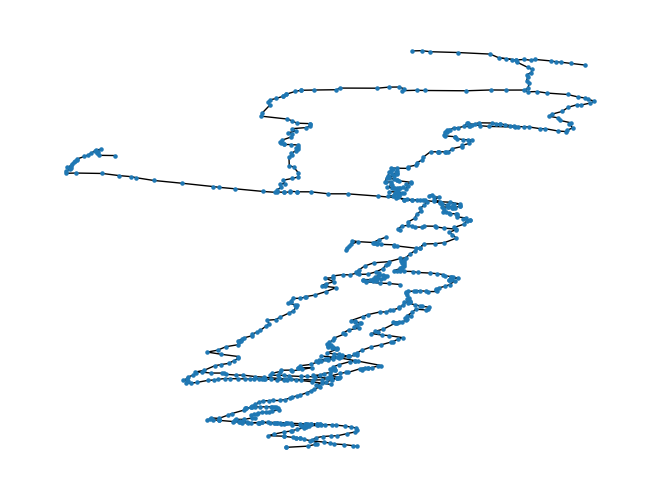

In [4]:
#BASIC PLOT IN PLAN VIEW FROM NETWORKX

nx.draw(G,get_pos2d(G),node_size=5)

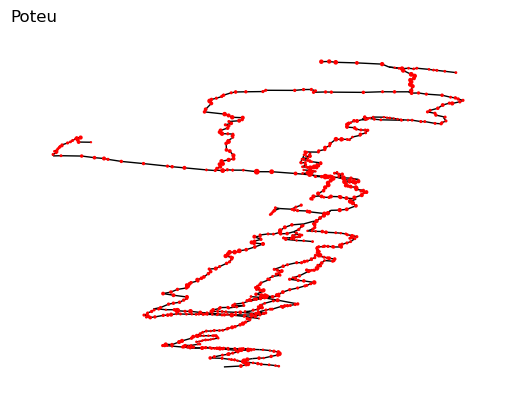

In [10]:
#PLOT WITH WEIGHTED NODE GEOMETRY
node_sizes = []
labels = {}
for n in G.nodes:
    if G.nodes('csdim')[n] is not None:
        node_sizes.append( nx.get_node_attributes(G,'csdim')[n][0]*1 )
    else:
        node_sizes.append( 0.0 )

plt.figure()
ax = plt.gca()
ax.set_title(cavename, loc='left',ha='left', wrap=True )
nx.draw(G,get_pos2d(G),node_size=node_sizes ,with_labels=False, node_color='red', ax=ax)




In [11]:
#how to get the dictionnary of values attached to the graph:

# get a list of all the dictionnaries that exists:
print(get_nodes_attributes(G))

#extract values into a dictionnary. Key are the node id.
nx.get_node_attributes(G,'pos')

{'pos', 'csdim', 'fulladdress', 'flag', 'idsql'}


{771: [579525.0, 113340.0, 600.0],
 778: [579525.0, 113340.01, 600.0],
 281: [579597.11, 114161.31, 701.28],
 60: [579592.57, 114162.36, 704.16],
 92: [579593.95, 114160.64, 707.62],
 79: [579593.95, 114160.64, 709.21],
 557: [579589.75, 114163.09, 711.62],
 805: [579592.51, 114170.88, 710.73],
 569: [579591.94, 114175.55, 710.89],
 474: [579592.12, 114180.49, 711.53],
 420: [579588.7, 114179.58, 712.87],
 41: [579588.34, 114181.08, 716.83],
 321: [579589.36, 114194.52, 716.25],
 645: [579590.11, 114199.04, 715.89],
 187: [579591.05, 114212.76, 714.8],
 471: [579592.31, 114216.12, 714.83],
 662: [579593.25, 114222.89, 714.5],
 621: [579591.83, 114224.57, 715.03],
 525: [579596.12, 114223.98, 716.0],
 188: [579602.88, 114223.47, 712.4],
 90: [579603.19, 114228.76, 711.73],
 176: [579608.2, 114233.88, 709.13],
 263: [579608.4, 114241.76, 708.63],
 601: [579612.09, 114249.61, 707.8],
 518: [579612.58, 114258.44, 707.24],
 640: [579617.4, 114276.47, 704.85],
 463: [579621.82, 114275.51, 70

In [12]:
#some other way to look into the object graph networkx
G.__dict__

{'graph': {'cavename': 'Poteu',
  'crs': 'epsg:21781',
  'original_data_rights': 'To confirm',
  'citation': 'Unknown yet'},
 '_node': {771: {'pos': [579525.0, 113340.0, 600.0],
   'fulladdress': ['Poteu.1.0'],
   'flag': ['fix'],
   'idsql': [1]},
  778: {'pos': [579525.0, 113340.01, 600.0],
   'fulladdress': ['Poteu.1.1', 'Poteu.62.0'],
   'idsql': [2, 532]},
  281: {'pos': [579597.11, 114161.31, 701.28],
   'fulladdress': ['Poteu.10.0', 'Poteu.16.15', 'Poteu.21.11'],
   'idsql': [3, 164, 196]},
  60: {'pos': [579592.57, 114162.36, 704.16],
   'fulladdress': ['Poteu.10.1'],
   'idsql': [4],
   'csdim': [0.8999999999999999, 1.9]},
  92: {'pos': [579593.95, 114160.64, 707.62],
   'fulladdress': ['Poteu.10.2'],
   'idsql': [5],
   'csdim': [0.5, 2.0]},
  79: {'pos': [579593.95, 114160.64, 709.21],
   'fulladdress': ['Poteu.10.3'],
   'idsql': [6],
   'csdim': [1.4, 1.8]},
  557: {'pos': [579589.75, 114163.09, 711.62],
   'fulladdress': ['Poteu.10.4'],
   'idsql': [7],
   'csdim': [0.9, 


 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd
--------------------------------------
               mean length = 70.732
                 cv length = 1.386
            length entropy = 0.495
                tortuosity = 1.312
       orientation entropy = 0.957
                      aspl = 8.146
                       cpd = 0.476
               mean degree = 2.247
                 cv degree = 0.450
 correlation vertex degree = -0.313
--------------------------------------

 This network contains :
 853  nodes (stations) and  862  edges.
  On the simplified graph, there are :  73  nodes (stations) and  82  edges,
 27  are extremity nodes (entries or exits) and  42  are junction nodes.
There is/are  1  connected component.s and  10  cycle.s.


Howard's parameter are (Howard, 1970) :  
 alpha:  0.07092198581560284 
 beta 1.1232876712328768 
 gamma 0.38497652582159625

Not

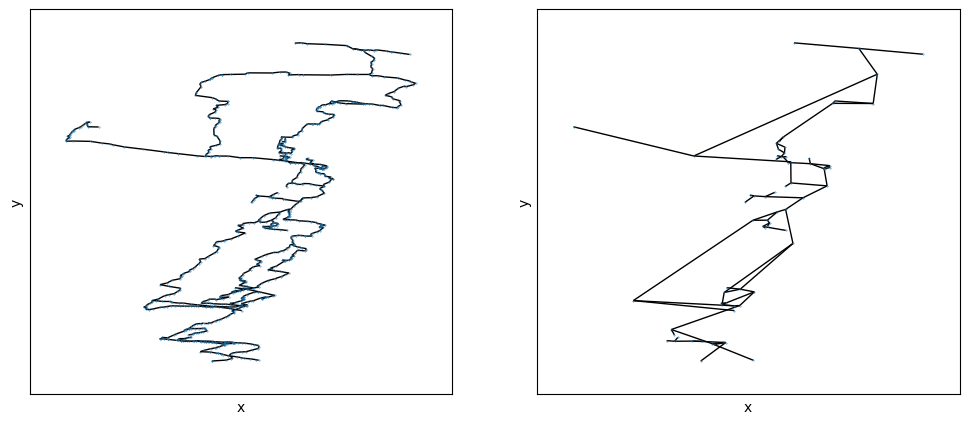

c:\Users\celia\anaconda3\envs\network\Lib\site-packages\karstnet\base.py:375: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
c:\Users\celia\anaconda3\envs\network\Lib\site-packages\karstnet\base.py:375: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout()


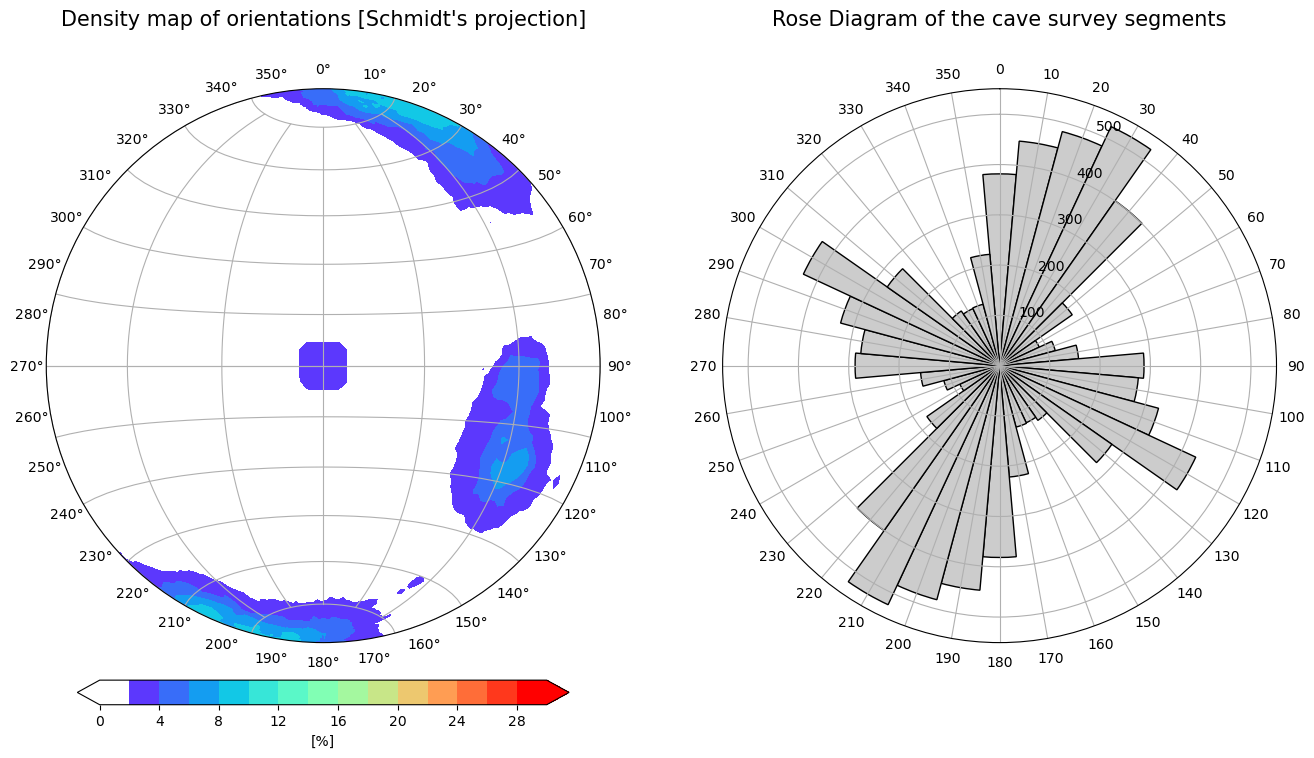

In [5]:
#Calculate karstnet statistics

import karstnet as kn

#load graph into a karstnet object
Kg = kn.from_nxGraph(G, dict(G.nodes('pos')), properties=None, verbose=True)

#print results and analysis
results = Kg.characterize_graph( verbose=True )
analysis = Kg.basic_analysis()

#plot the graph and simplified graph
fig1 = Kg.plot()

#plot the stereo plot
fig2 = Kg.stereo()